#### Problem 1(a)

In [14]:
using LinearAlgebra, PyPlot
import Random
function hilbert_matrix(n)
    H = zeros(Rational,n,n)
    for i in 1:n
        for j in 1:n
            H[i,j] = 1//(i+j-1)
        end
    end
    return H
end
H = hilbert_matrix(6)

6×6 Matrix{Rational}:
  1    1//2  1//3  1//4  1//5   1//6
 1//2  1//3  1//4  1//5  1//6   1//7
 1//3  1//4  1//5  1//6  1//7   1//8
 1//4  1//5  1//6  1//7  1//8   1//9
 1//5  1//6  1//7  1//8  1//9   1//10
 1//6  1//7  1//8  1//9  1//10  1//11

#### Problem 1(b)

In [16]:
Symmetric(H)

6×6 Symmetric{Rational, Matrix{Rational}}:
  1    1//2  1//3  1//4  1//5   1//6
 1//2  1//3  1//4  1//5  1//6   1//7
 1//3  1//4  1//5  1//6  1//7   1//8
 1//4  1//5  1//6  1//7  1//8   1//9
 1//5  1//6  1//7  1//8  1//9   1//10
 1//6  1//7  1//8  1//9  1//10  1//11

#### Problem 1(c)

In [31]:
G = Float64.(H*H)

6×6 Matrix{Float64}:
 1.49139   0.857143  0.616071  0.484788  0.401091  0.342691
 0.857143  0.511797  0.375     0.298611  0.249074  0.214078
 0.616071  0.375     0.277422  0.222222  0.186111  0.160438
 0.484788  0.298611  0.222222  0.178657  0.15      0.129545
 0.401091  0.249074  0.186111  0.15      0.126157  0.109091
 0.342691  0.214078  0.160438  0.129545  0.109091  0.0944211

#### Problem 1(d)

$$
    x = G^{-1}b
$$

#### Problem 1(e)

In [30]:
b = zeros(6)
for i in 1:6
    b[i] = sum(G[i,])
end
x = inv(G)*b
x

6-element Vector{Float64}:
  0.9999961853027344
  0.0
  0.00048828125
 -0.001953125
  0.0048828125
 -0.001953125

#### Problem 1(f)

In [34]:
norm(x.-1)^2

4.997102022185573

#### Problem 1(g)

In [41]:
maximum(eigvals(G))/minimum(eigvals(G))

2.235747710866038e14

#### Problem 2 - The Strassen Algorithm

In [187]:
Random.seed!(1234)
function submatrix(A)
    n = size(A,1)
    A11 = zeros(Int(n/2),Int(n/2))
    A12 = zeros(Int(n/2),Int(n/2))
    A21 = zeros(Int(n/2),Int(n/2))
    A22 = zeros(Int(n/2),Int(n/2))
    #println("start creating matrix, start A11")
    for i in 1:Int(n/2)
        for j in 1:Int(n/2)
            A11[i,j] = A[i,j]
        end
    end
    #println("finish A11")
    for i in 1+Int(n/2):n
        for j in 1:Int(n/2)
            A21[i-Int(n/2),j] = A[i,j]
        end
    end
    #println("finish A12")
    for i in 1:Int(n/2)
        for j in 1+Int(n/2):n
            A12[i,j-Int(n/2)] = A[i,j]
        end
    end
    #println("finish A21")
    for i in 1+Int(n/2):n
        for j in 1+Int(n/2):n
            A22[i-Int(n/2),j-Int(n/2)] = A[i,j]
        end
    end
    #println("finish A22")
    return A11, A12, A21, A22
end
function strassen(A,B)
    n = size(A,1)
    #println("start the program, n = ", n)
    if n <= 2
        #println("the smallest matrix")
        A11, A12, A21, A22 = A[1,1],A[1,2],A[2,1],A[2,2]
        B11, B12, B21, B22 = B[1,1],B[1,2],B[2,1],B[2,2]
        M1 = (A11+A22)*(B11+B22)
        M2 = (A21+A22)*B11
        M3 = A11*(B12-B22)
        M4 = A22*(B21-B11)
        M5 = (A11 + A12)*B22
        M6 = (A21 - A11)*(B11+B12)
        M7 = (A12 -A22)*(B21+B22)
        C11 = M1 + M4 - M5 + M7
        C12 = M3 + M5
        C21 = M2 + M4
        C22 = M1 - M2 + M3 + M6
        #println("C2 is", C11, "C2 is",C12,"C3 is",C21,"C4 is",C22)
        return [C11 C12
                C21 C22]
    else
        #println("start calculation")
        A11, A12, A21, A22 = submatrix(A)
        B11, B12, B21, B22 = submatrix(B)
        M1 = strassen((A11+A22),(B11+B22))
        M2 = strassen((A21+A22),B11)
        M3 = strassen(A11,(B12-B22))
        M4 = strassen(A22,(B21-B11))
        M5 = strassen((A11+A12),B22)
        M6 = strassen((A21 - A11),(B11+B12))
        M7 = strassen((A12 -A22),(B21+B22))
        C11 = M1 + M4 - M5 + M7
        C12 = M3 + M5
        C21 = M2 + M4
        C22 = M1 - M2 + M3 + M6
        return[C11 C12
               C21 C22]
    end
    
end
A = randn(256,256)
B = randn(256,256)
A11, A12, A21, A22 = submatrix(A)
C = strassen(A,B)
D = A * B
maximum(abs.(C-D)) 

5.8264504332328215e-12

#### Problem 3(a)

In [24]:
using Polynomials
function polyfit(x,y,p)
    n = length(x)
    A = reduce(hcat, [x .^ i for i in 0:p])
    ab = A \ y
    return ab
end

polyfit (generic function with 1 method)

#### Problem 3(b)

In [44]:
function polyval(pol, xx)
    xx = reduce(hcat, [xx .^ i for i in 0:(length(pol)-1)])
    return xx*pol
end

polyval (generic function with 1 method)

#### Problem 3(c)

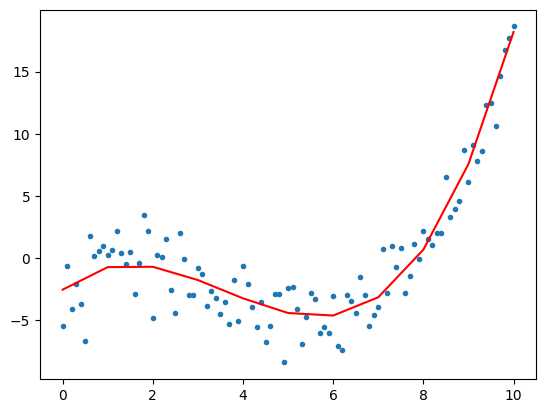

In [46]:
x = 0:0.1:10
noise = 2randn(size(x))
y = @. 0.1x^3 - x^2 + 2x - 2 + noise; # Example data: cubic with noise
using PyPlot
xplot = 0:10;
ab = polyfit(x,y,3)
yplot = polyval(ab,xplot)
plot(x,y,".")
plot(xplot, yplot, "r");

#### Problem 4

In [81]:
lines = readlines("words.txt")
function check_consec(f)
    for i in 1:(length(f)-5)
        if (f[i] == f[i+1])&(f[i+2] == f[i+3])&(f[i+4] == f[i+5])
            return true
        end
    end
    return false
end


a = []
b = []
for i in 1:length(lines)
    if check_consec(lines[i])
        push!(a,lines[i])
        append!(b,i)
        println(lines[i])
    end
end


bookkeeper
bookkeepers
bookkeeping
bookkeepings
